In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow version:", tf.__version__)


Num GPUs Available: 0
TensorFlow version: 2.18.0


In [3]:
import pandas as pd

data=pd.read_csv('final_target_data.csv')

In [4]:
data.head()

,TARGET,year,month,hour,weekday,ADDR_PCT_CD,CRIME_CLASS,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,LOCATION_CODE
0,0,2013,10,13,0,120.0,0,0,0,0,1866
1,1,2012,5,20,2,24.0,0,1,1,1,9298
2,0,2014,1,13,4,108.0,1,0,2,0,6804
3,0,2014,8,14,0,102.0,0,2,0,2,4883
4,1,2012,2,1,0,32.0,0,3,3,2,9433


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612689 entries, 0 to 4612688
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   TARGET         int64  
 1   year           int64  
 2   month          int64  
 3   hour           int64  
 4   weekday        int64  
 5   ADDR_PCT_CD    float64
 6   CRIME_CLASS    int64  
 7   VIC_AGE_GROUP  int64  
 8   VIC_RACE       int64  
 9   VIC_SEX        int64  
 10  LOCATION_CODE  int64  
dtypes: float64(1), int64(10)
memory usage: 387.1 MB


In [6]:
X = data.drop(columns='TARGET')
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# I. Random Forest

In [6]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7982


In [10]:
print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_pred:', np.unique(y_pred))


Unique values in y_test: [0 1 2 3]
Unique values in y_pred: [0 1 2 3]


Unique values in y_test: [0 1 2 3]
Unique values in y_pred: [0 1 2 3]


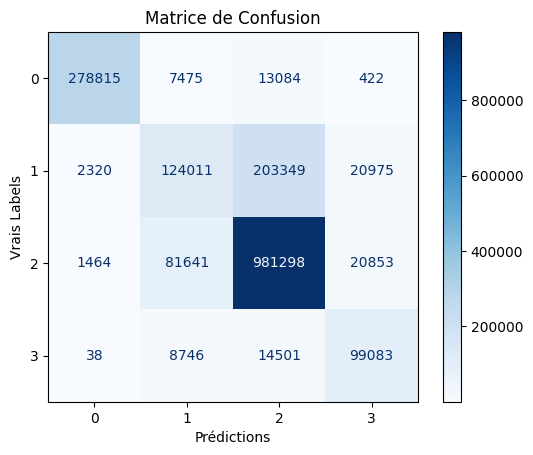

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_pred:', np.unique(y_pred))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))

# Affichage de la matrice de confusion
disp.plot(cmap='Blues', values_format='d')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vrais Labels')
plt.show()




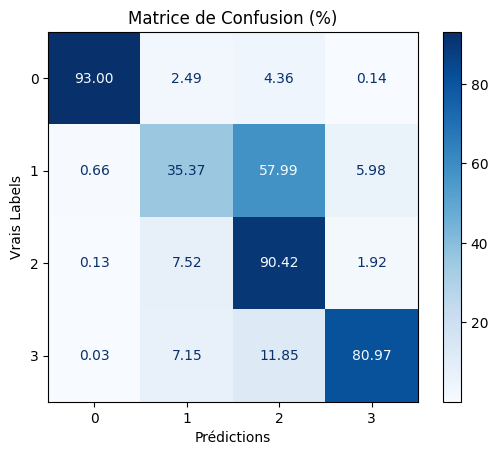

In [12]:

conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', values_format='.2f')
plt.title('Matrice de Confusion (%)')
plt.xlabel('Prédictions')
plt.ylabel('Vrais Labels')
plt.show()


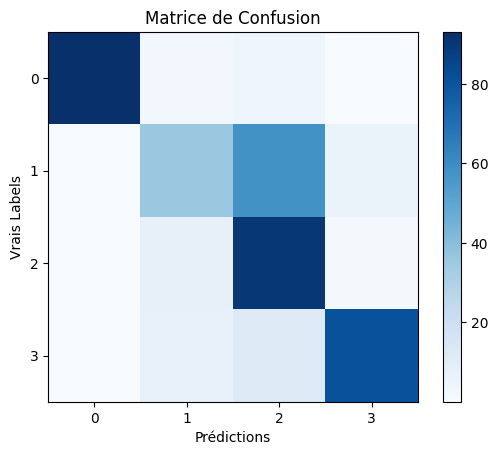

In [15]:

conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', include_values=False)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vrais Labels')
plt.show()


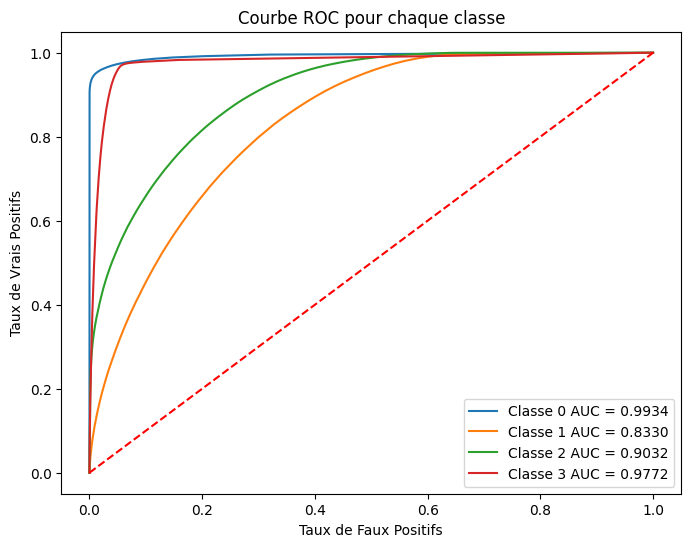

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
y_pred_prob = rf_model.predict_proba(X_test) 

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])  
    plt.plot(fpr, tpr, label=f'Classe {i} AUC = {roc_auc:.4f}') 

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Titre et étiquettes du graphique
plt.title('Courbe ROC pour chaque classe')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.legend(loc='lower right')
plt.show()



In [18]:
# AUC score
print(f'AUC: {roc_auc:.4f}')

AUC: 0.9772


# II. SVM

In [19]:
X = data.drop(columns='TARGET')
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)  # probability=True is necessary for predict_proba
svm_model.fit(X_train, y_train)


In [ ]:
y_pred = svm_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_pred:', np.unique(y_pred))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))

# Displaying the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


In [ ]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


In [ ]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', include_values=False)  # Remove the actual numbers
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
y_pred_prob = svm_model.predict_proba(X_test) 

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])  
    plt.plot(fpr, tpr, label=f'Class {i} AUC = {roc_auc:.4f}') 

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Title and labels for the plot
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# AUC score
print(f'AUC: {roc_auc:.4f}')


# III. KNN

In [5]:
X = data.drop(columns='TARGET')
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors specifies the number of neighbors to consider
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [7]:
y_pred = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.5993


Unique values in y_test: [0 1 2 3]
Unique values in y_pred: [0 1 2 3]


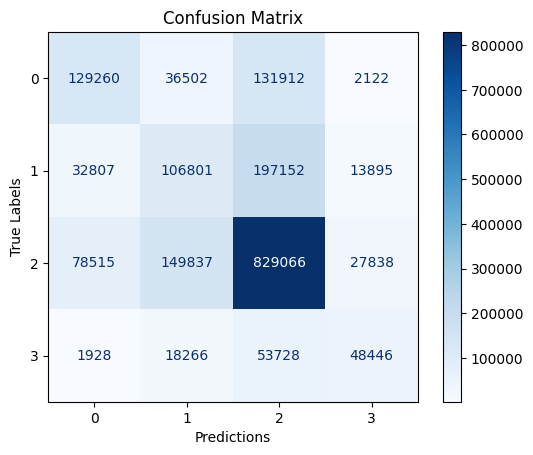

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_pred:', np.unique(y_pred))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))

# Displaying the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


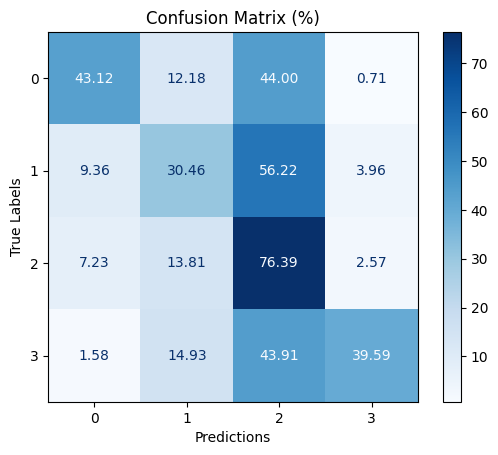

In [9]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


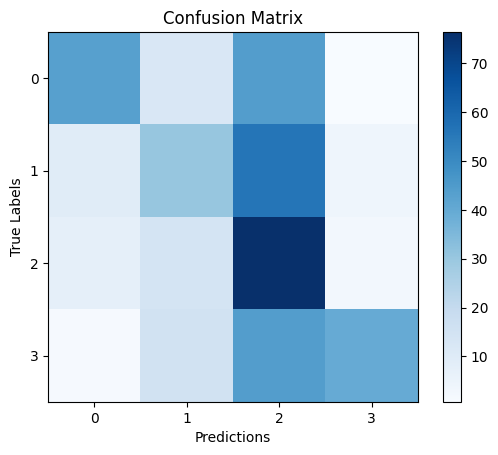

In [10]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', include_values=False)  # Remove the actual numbers
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


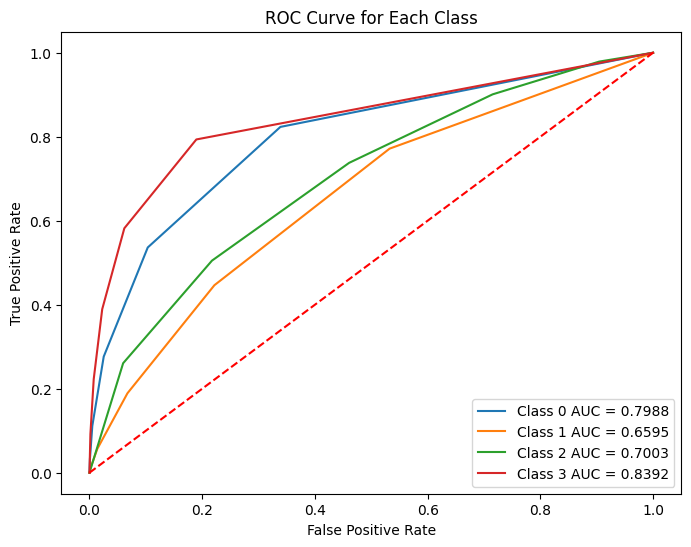

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
y_pred_prob = knn_model.predict_proba(X_test)  # Get probability estimates for each class

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])  
    plt.plot(fpr, tpr, label=f'Class {i} AUC = {roc_auc:.4f}') 

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Title and labels for the plot
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [12]:
# AUC score
print(f'AUC: {roc_auc:.4f}')


AUC: 0.8392


# IV. XGBoost

In [7]:
X = data.drop(columns='TARGET')
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
import xgboost as xgb

# Initialize XGBoost model with parameters
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:09:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [9]:
y_pred = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7976


Unique values in y_test: [0 1 2 3]
Unique values in y_pred: [0 1 2 3]


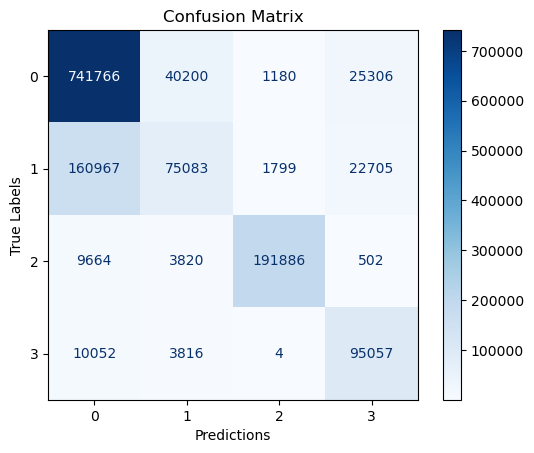

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_pred:', np.unique(y_pred))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))

# Display the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


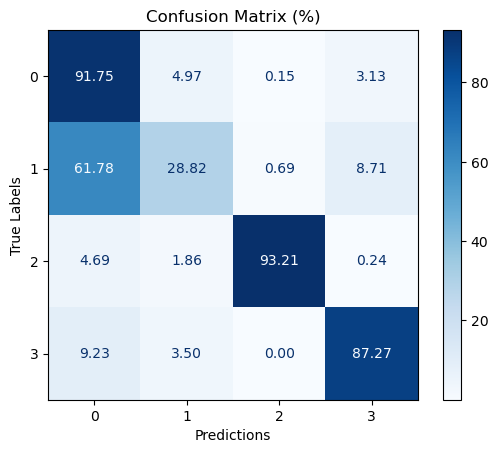

In [11]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


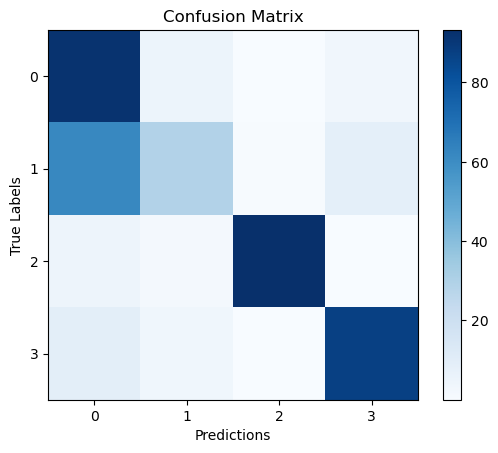

In [12]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', include_values=False)  # Remove the numbers
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


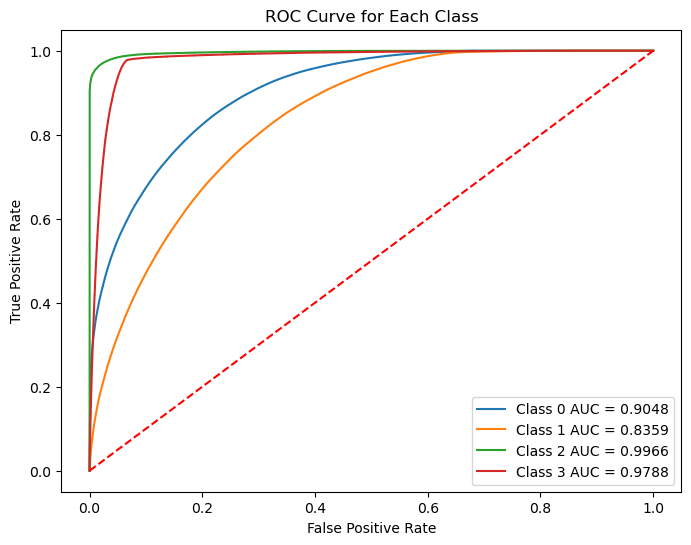

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
y_pred_prob = xgb_model.predict_proba(X_test)  # Get probability estimates for each class

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])  
    plt.plot(fpr, tpr, label=f'Class {i} AUC = {roc_auc:.4f}') 

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Title and labels for the plot
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [14]:
# AUC score
print(f'AUC: {roc_auc:.4f}')


AUC: 0.9788


In [15]:
import joblib

joblib.dump(xgb_model, 'xgb_model.joblib')




['xgb_model.joblib']

# XGBoost with Hyperparameter tuning

In [16]:
X = data.drop(columns='TARGET')
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
                           param_grid, scoring='accuracy', cv=3, verbose=2)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
xgb_model = grid_search.best_estimator_


Fitting 3 folds for each of 486 candidates, totalling 1458 fits


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:11:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  24.8s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:12:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  24.1s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:12:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  24.5s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:12:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  20.0s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:13:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  21.0s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:13:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  19.7s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:13:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=  45.5s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:14:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=  46.9s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time=  46.2s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:16:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=  40.1s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:16:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=  39.6s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:17:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time=  36.7s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:18:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 1.9min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:20:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 1.9min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:21:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 1.8min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:23:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=1.0; total time= 1.4min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:25:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=1.0; total time= 1.5min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:26:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=1.0; total time= 1.5min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:28:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.8; total time=  21.6s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:28:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.8; total time=  22.0s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:28:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.8; total time=  20.6s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:29:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=  17.4s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:29:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=  17.1s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:29:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=  17.8s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:30:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=  41.7s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:30:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=  42.0s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:31:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=  42.6s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=  36.2s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:32:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=  34.6s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:33:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time=  33.3s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:33:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time= 1.7min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time= 1.7min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:37:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time= 1.6min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:39:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, subsample=1.0; total time= 1.4min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:40:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, subsample=1.0; total time= 1.6min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:42:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, subsample=1.0; total time= 1.6min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:43:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  21.1s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:43:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  21.3s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:44:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  20.4s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:44:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0; total time=  17.3s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:44:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0; total time=  17.0s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:45:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0; total time=  17.3s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:45:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time=  42.9s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:46:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time=  41.2s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:46:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time=  39.8s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:47:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0; total time=  33.4s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:48:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0; total time=  35.5s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:48:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0; total time=  38.6s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:49:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.8; total time= 1.7min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:51:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.8; total time= 2.2min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:53:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.8; total time= 2.1min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:55:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, subsample=1.0; total time= 1.7min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:57:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, subsample=1.0; total time= 1.6min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:58:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, subsample=1.0; total time= 1.6min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:00:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  30.9s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:00:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  31.3s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:01:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  30.2s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:01:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  25.3s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:02:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  25.0s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:02:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  25.2s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:03:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8; total time= 1.0min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:04:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8; total time= 1.0min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:05:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8; total time= 1.0min


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:06:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0; total time=  49.9s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:07:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0; total time=  50.9s


c:\Users\MSI\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:07:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
y_pred = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_pred:', np.unique(y_pred))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))

# Display the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()

In [ ]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()

In [ ]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', include_values=False)  # Remove the numbers
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
y_pred_prob = xgb_model.predict_proba(X_test)  # Get probability estimates for each class

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])  
    plt.plot(fpr, tpr, label=f'Class {i} AUC = {roc_auc:.4f}') 

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Title and labels for the plot
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# AUC score
print(f'AUC: {roc_auc:.4f}')

# V. LGBM

In [21]:
X = data.drop(columns='TARGET')
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
import lightgbm as lgb

# Initialize LightGBM model with parameters
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 4335506, number of used features: 10
[LightGBM] [Info] Start training from score -1.826900
[LightGBM] [Info] Start training from score -1.665425
[LightGBM] [Info] Start training from score -0.537206
[LightGBM] [Info] Start training from score -2.724191


LGBMClassifier(random_state=42)

In [23]:
y_pred = lgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7986


Unique values in y_test: [0 1 2 3]
Unique values in y_pred: [0 1 2 3]


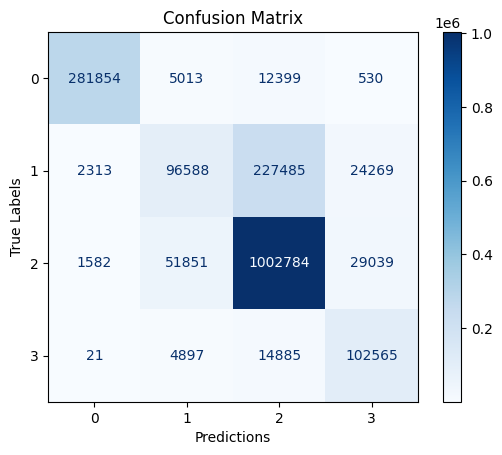

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_pred:', np.unique(y_pred))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))

# Display the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


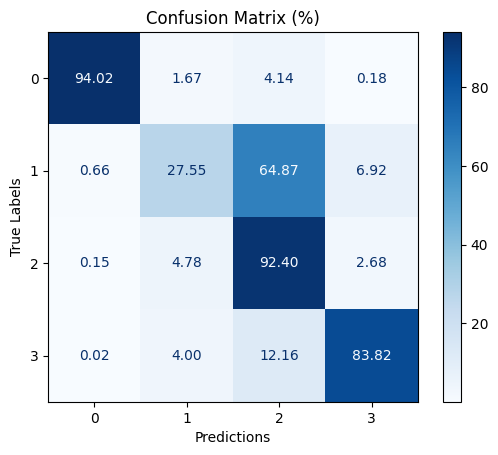

In [25]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


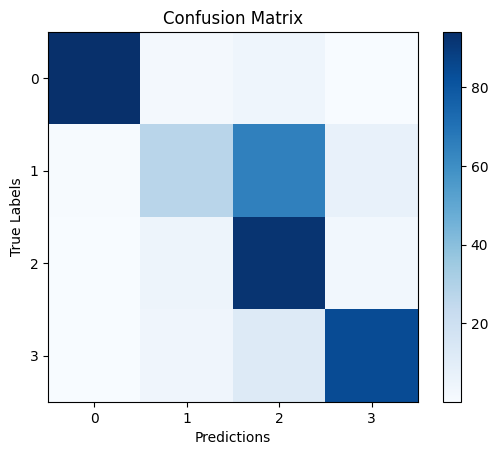

In [26]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', include_values=False)  # Remove the numbers
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


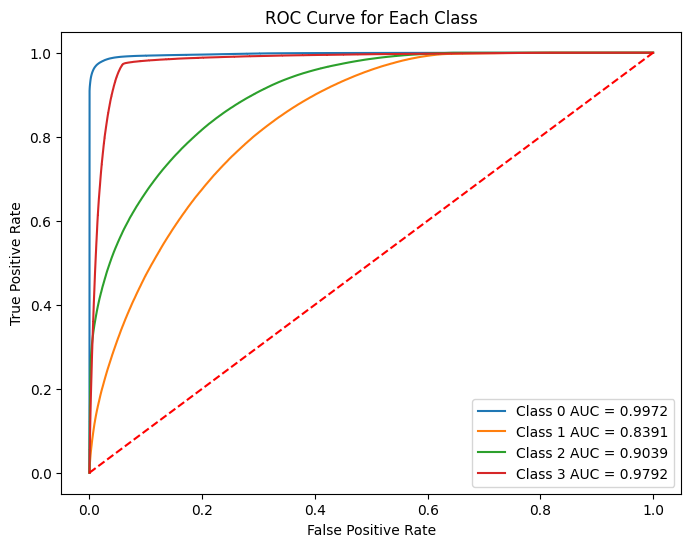

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
y_pred_prob = lgb_model.predict_proba(X_test)  # Get probability estimates for each class

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])  
    plt.plot(fpr, tpr, label=f'Class {i} AUC = {roc_auc:.4f}') 

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Title and labels for the plot
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [28]:
# AUC score
print(f'AUC: {roc_auc:.4f}')


AUC: 0.9792


## Réseaux de neurone 

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [8]:
# Separate features and target
X = data.drop(columns=['TARGET'])
y = data['TARGET']

In [9]:
# Encode the target variable if it's not already numerical
y = LabelEncoder().fit_transform(y)

# One-hot encode the target variable for classification
y_categorical = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
eval_results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {eval_results[0]:.4f}, Test Accuracy: {eval_results[1]:.4f}")

# Save the model
model.save('crime_severity_model.h5')

# Generate confusion matrix
# Predict class labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Assuming you already have y_pred and y_true from your previous code
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert confusion matrix to percentage
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix as percentages
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (in %)')

plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


c:\Users\MSI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
184508/184508 ━━━━━━━━━━━━━━━━━━━━ 197s 1ms/step - accuracy: 0.7632 - loss: 0.5459 - val_accuracy: 0.7826 - val_loss: 0.4991
Epoch 2/30
184508/184508 ━━━━━━━━━━━━━━━━━━━━ 193s 1ms/step - accuracy: 0.7755 - loss: 0.5189 - val_accuracy: 0.7819 - val_loss: 0.4971
Epoch 3/30
184508/184508 ━━━━━━━━━━━━━━━━━━━━ 193s 1ms/step - accuracy: 0.7758 - loss: 0.5174 - val_accuracy: 0.7814 - val_loss: 0.4989
Epoch 4/30
184508/184508 ━━━━━━━━━━━━━━━━━━━━ 201s 1ms/step - accuracy: 0.7760 - loss: 0.5172 - val_accuracy: 0.7838 - val_loss: 0.4961
Epoch 5/30
184508/184508 ━━━━━━━━━━━━━━━━━━━━ 215s 1ms/step - accuracy: 0.7763 - loss: 0.5174 - val_accuracy: 0.7804 - val_loss: 0.4971
Epoch 6/30
184508/184508 ━━━━━━━━━━━━━━━━━━━━ 208s 1ms/step - accuracy: 0.7767 - loss: 0.5171 - val_accuracy: 0.7824 - val_loss: 0.4974
Epoch 7/30
184508/184508 ━━━━━━━━━━━━━━━━━━━━ 198s 1ms/step - accuracy: 0.7768 - loss: 0.5166 - val_accuracy: 0.7832 - val_loss: 0.4982
Epoch 8/30
184508/184508 ━━━━━━━━━━━━━━━━━━━━ 19

Test Loss: 0.5009, Test Accuracy: 0.7811
28830/28830 ━━━━━━━━━━━━━━━━━━━━ 18s 627us/step


NameError: name 'cm_percentage' is not defined

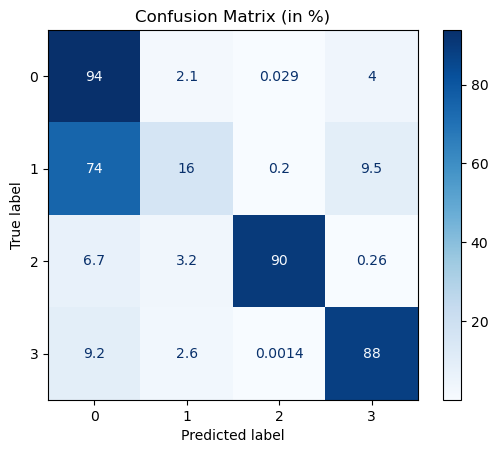

In [11]:

# Assuming you already have y_pred and y_true from your previous code
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert confusion matrix to percentage
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix as percentages
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (in %)')

plt.show()


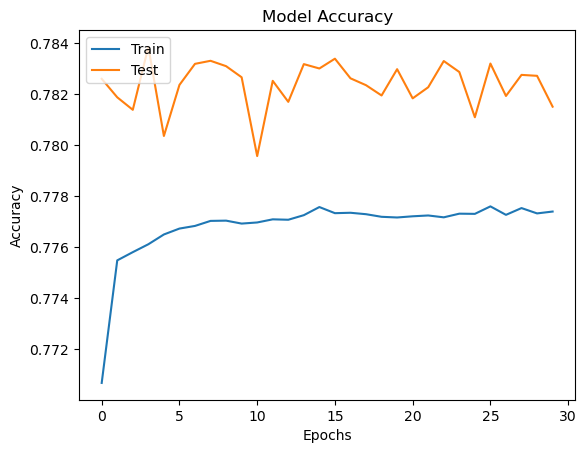

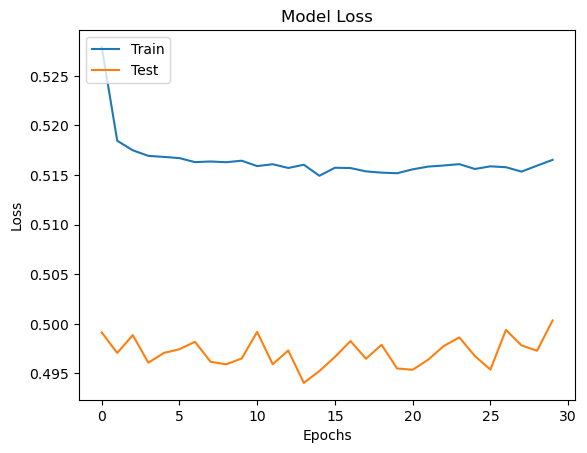

Index(['TARGET', 'year', 'month', 'hour', 'weekday', 'ADDR_PCT_CD',
       'CRIME_CLASS', 'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX', 'LOCATION_CODE'],
      dtype='object')


c:\Users\MSI\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
184508/184508 ━━━━━━━━━━━━━━━━━━━━ 460s 2ms/step - accuracy: 0.6620 - loss: 0.5693 - val_accuracy: 0.6909 - val_loss: 0.6134 - learning_rate: 0.0010
Epoch 2/50
184508/184508 ━━━━━━━━━━━━━━━━━━━━ 520s 3ms/step - accuracy: 0.6756 - loss: 0.5442 - val_accuracy: 0.6911 - val_loss: 0.6195 - learning_rate: 0.0010
Epoch 3/50
184508/184508 ━━━━━━━━━━━━━━━━━━━━ 534s 3ms/step - accuracy: 0.6763 - loss: 0.5474 - val_accuracy: 0.6468 - val_loss: 0.6563 - learning_rate: 0.0010
Epoch 4/50
184508/184508 ━━━━━━━━━━━━━━━━━━━━ 529s 3ms/step - accuracy: 0.6766 - loss: 0.5486 - val_accuracy: 0.6819 - val_loss: 0.6211 - learning_rate: 0.0010
Epoch 5/50
184508/184508 ━━━━━━━━━━━━━━━━━━━━ 494s 3ms/step - accuracy: 0.6759 - loss: 0.5484 - val_accuracy: 0.6782 - val_loss: 0.6287 - learning_rate: 0.0010
Epoch 6/50
184500/184508 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6748 - loss: 0.5485
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
184508/184508 ━━━━━━━━━━━━━━━━━

Test Loss: 0.6177, Test Accuracy: 0.7001
28830/28830 ━━━━━━━━━━━━━━━━━━━━ 18s 612us/step


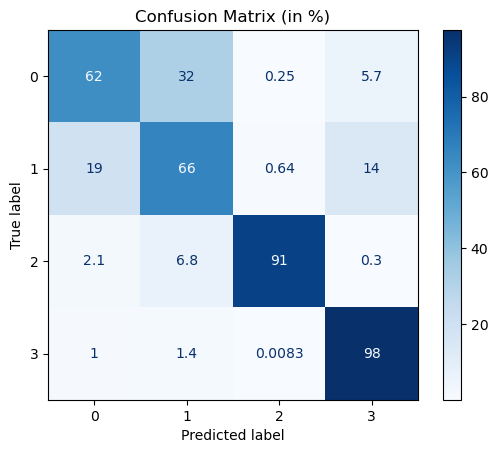

              precision    recall  f1-score   support

           0       0.90      0.62      0.74    539034
           1       0.39      0.66      0.49    173750
           2       0.98      0.91      0.94    137146
           3       0.56      0.98      0.71     72608

    accuracy                           0.70    922538
   macro avg       0.71      0.79      0.72    922538
weighted avg       0.79      0.70      0.72    922538



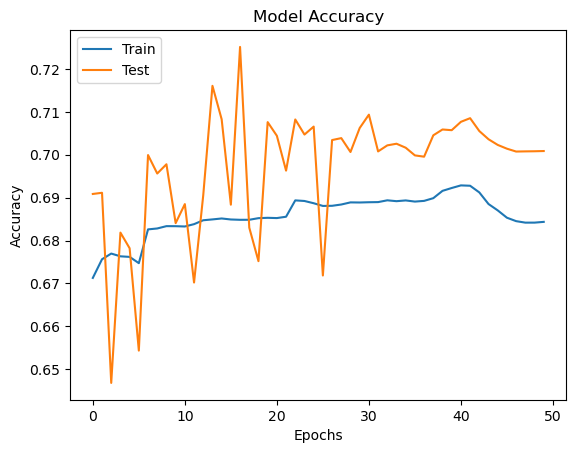

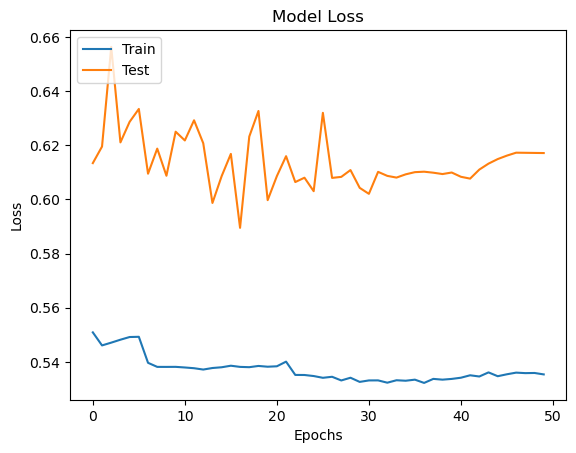

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('final_target_data.csv')

# Check column names to ensure you refer to the correct target column
print(data.columns)

# Separate features and target
X = data.drop(columns=['TARGET'])
y = data['TARGET']

# Encode the target variable if it's not already numerical
y = LabelEncoder().fit_transform(y)

# One-hot encode the target variable for classification
y_categorical = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Compute class weights for each class to deal with imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(enumerate(class_weights))

# Define the neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Increase neurons
    Dropout(0.5),  # Increase dropout to avoid overfitting
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up a learning rate scheduler to adjust learning rate during training
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

# Train the model with class weights
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, 
                    class_weight=class_weight_dict, callbacks=[lr_scheduler], verbose=1)

# Evaluate the model
eval_results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {eval_results[0]:.4f}, Test Accuracy: {eval_results[1]:.4f}")

# Save the model
model.save('crime_severity_model_no_smote.h5')

# Generate confusion matrix
# Predict class labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Convert confusion matrix to percentage
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix as percentages
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (in %)')
plt.show()

# Print detailed classification report for Precision, Recall, F1-Score
report = classification_report(y_true, y_pred, target_names=np.unique(y).astype(str))
print(report)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [2]:
import pandas as pd

data=pd.read_csv('final_target_data.csv')
data

,TARGET,year,month,hour,weekday,ADDR_PCT_CD,CRIME_CLASS,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,LOCATION_CODE
0,0,2013,10,13,0,120.0,0,0,0,0,1866
1,1,2012,5,20,2,24.0,0,1,1,1,9298
2,0,2014,1,13,4,108.0,1,0,2,0,6804
3,0,2014,8,14,0,102.0,0,2,0,2,4883
4,1,2012,2,1,0,32.0,0,3,3,2,9433
...,...,...,...,...,...,...,...,...,...,...,...
4612684,0,2018,9,22,1,110.0,1,1,1,1,6778
4612685,0,2018,1,14,0,47.0,0,0,3,2,10689
4612686,1,2018,8,14,1,78.0,0,2,3,0,4001
4612687,1,2018,12,4,6,109.0,0,3,2,2,8555


In [1]:
import pandas as pd

df=pd.read_csv('original_data.csv')
df

,TARGET,year,month,hour,weekday,ADDR_PCT_CD,CRIME_CLASS,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,LOCATION_CODE
0,PROPERTY,2013,10,13,Monday,120.0,MISDEMEANOR,45-64,WHITE,M,87G7JWGF+
1,PERSONAL,2012,5,20,Wednesday,24.0,MISDEMEANOR,UNKNOWN,UNKNOWN,E,87G8R22J+
2,PROPERTY,2014,1,13,Friday,108.0,FELONY,45-64,ASIAN / PACIFIC ISLANDER,M,87G8P4W4+
3,PROPERTY,2014,8,14,Monday,102.0,MISDEMEANOR,18-24,WHITE,F,87G8M4MX+
4,PERSONAL,2012,2,1,Monday,32.0,MISDEMEANOR,25-44,BLACK,F,87G8R365+
...,...,...,...,...,...,...,...,...,...,...,...
4612684,PROPERTY,2018,9,22,Tuesday,110.0,FELONY,UNKNOWN,UNKNOWN,E,87G8P4RR+
4612685,PROPERTY,2018,1,14,Monday,47.0,MISDEMEANOR,45-64,BLACK,F,87G8V4HP+
4612686,PERSONAL,2018,8,14,Tuesday,78.0,MISDEMEANOR,18-24,BLACK,M,87G8M2C8+
4612687,PERSONAL,2018,12,4,Sunday,109.0,MISDEMEANOR,25-44,ASIAN / PACIFIC ISLANDER,F,87G8Q4PV+


In [4]:
import pandas as pd

# Load the datasets
df_original = pd.read_csv('original_data.csv')  # Original dataset
df_encoded = pd.read_csv('final_target_data.csv')  # Encoded dataset
# Show the unique values of the original TARGET column
original_target_values = df_original['TARGET'].unique()
print("Original TARGET values:")
print(original_target_values)


Original TARGET values:
['PROPERTY' 'PERSONAL' 'SEXUAL' 'DRUGS/ALCOHOL']


In [5]:
import pandas as pd

# Load the datasets
df_original = pd.read_csv('original_data.csv')  # Original dataset
df_encoded = pd.read_csv('final_target_data.csv')  # Encoded dataset

# Extract the TARGET column from both datasets
original_target = df_original['TARGET'].dropna().unique()
encoded_target = df_encoded['TARGET'].dropna().unique()

# If the TARGET column in both datasets have the same number of unique values, align them
if len(original_target) == len(encoded_target):
    target_mapping = pd.DataFrame({
        'Original TARGET': original_target,
        'Encoded TARGET': encoded_target
    })
else:
    target_mapping = "Mismatch in the number of unique values between the two datasets."

# Display the mapping
print(target_mapping)


  Original TARGET  Encoded TARGET
0        PROPERTY               0
1        PERSONAL               1
2          SEXUAL               2
3   DRUGS/ALCOHOL               3
